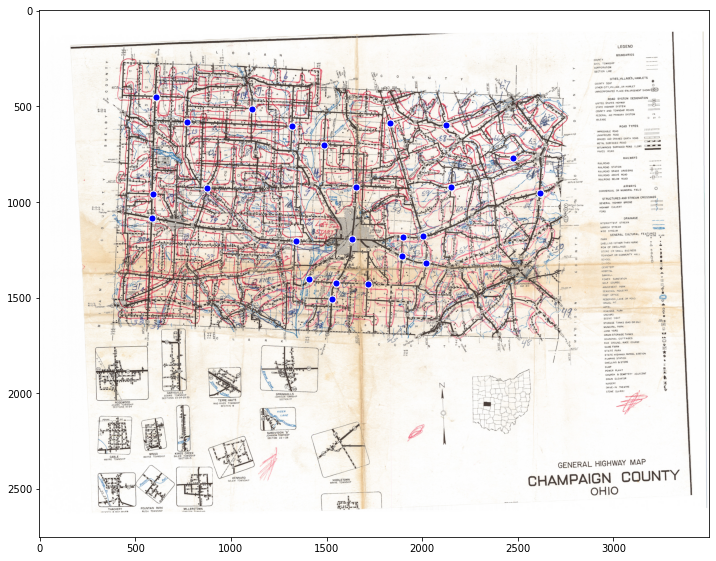

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/Users/kmarsh/Code/kmarsh/autogeoreferencer/data/OH-Champaign-72-01.jpg')
points = np.loadtxt('/Users/kmarsh/Code/kmarsh/autogeoreferencer/data/OH-Champaign-72-01.csv', delimiter=',', usecols=(0, 1))
intersections = np.loadtxt('/Users/kmarsh/Code/kmarsh/autogeoreferencer/data/39021-intersections-3857.psv', delimiter='|')
x = points[:,0]
y = points[:,1]

plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.scatter(x, y, color='blue', edgecolor='white', s=50)
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.show()

In [31]:
import twirl.utils

t = twirl.utils.find_transform(intersections, points, n=20, tolerance=1)

In [32]:
print(t)

pad = lambda x: np.hstack([x, np.ones((x.shape[0], 1))])
unpad = lambda x: x[:,:-1]

transform = lambda x: unpad(np.dot(pad(x), t))

transform(np.asarray([[2126, 598]]))


[[ 1.26423247e-01  8.00876062e-02  7.85983236e+05]
 [-9.37769795e-02  1.22131535e-01 -1.46696646e+06]
 [ 0.00000000e+00 -1.32348898e-22  1.00000000e+00]]


array([[212.69718943, 243.30090867]])

In [38]:
q, s = twirl.utils.quads_stars(intersections)